In [ ]:
import pandas as pd

# Loading the dataset
data = pd.read_csv("/content/dataset.csv")

# a. Number of instances
num_instances = len(data)

# b. Number of features
num_features = len(data.columns) - 1  # excluding the target column

# c. Number of instances from each class
instances_per_class = data['classification'].value_counts()

print("a. Number of instances:", num_instances)
print("b. Number of features:", num_features)
print("c. Number of instances from each class:")
print(instances_per_class)


a. Number of instances: 100000
b. Number of features: 34
c. Number of instances from each class:
classification
malware    50000
benign     50000
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains the features and 'y' contains the labels
X = data.drop(columns=['classification', 'hash'])  # Assuming 'hash' is not a feature
y = data['classification']

# Spliting the dataset into training and testing sets, maintaining class balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


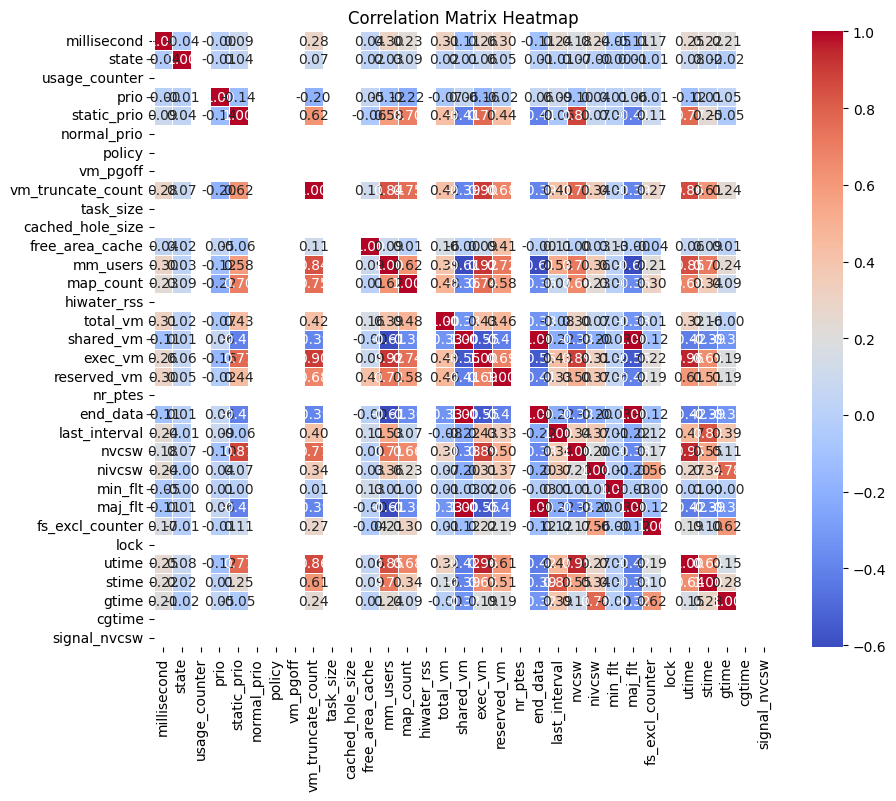

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Excluding the non-numeric columns from correlation calculation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


<Axes: title={'center': 'Class Distribution'}, xlabel='classification'>

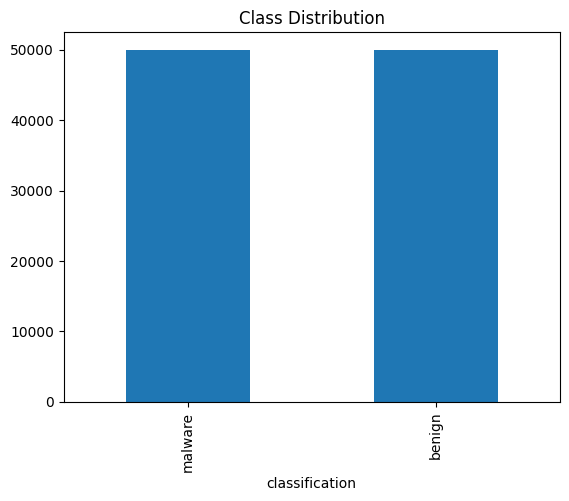

In [8]:
# Example of EDA
import matplotlib.pyplot as plt

# Histogram of class distribution
data['classification'].value_counts().plot(kind='bar', title='Class Distribution')




In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Initializing the classifiers
classifier1 = RandomForestClassifier()
classifier2 = SVC()
classifier3 = KNeighborsClassifier()


In [10]:
# Training the classifiers
classifier1.fit(X_train, y_train)
classifier2.fit(X_train, y_train)
classifier3.fit(X_train, y_train)


KNeighborsClassifier()

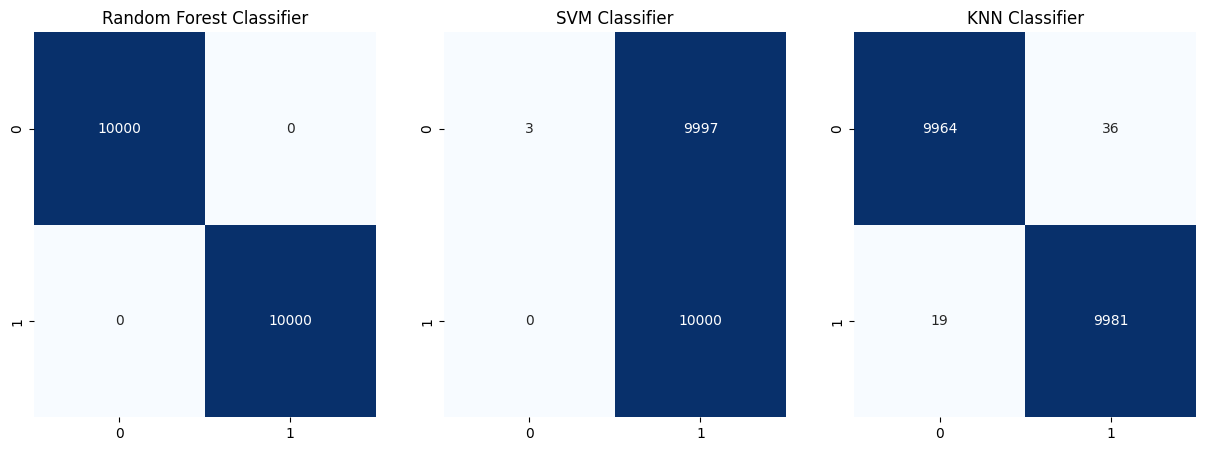

In [12]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Testing the classifiers
y_pred1 = classifier1.predict(X_test)
y_pred2 = classifier2.predict(X_test)
y_pred3 = classifier3.predict(X_test)

# Generating confusion matrices
cm1 = confusion_matrix(y_test, y_pred1)
cm2 = confusion_matrix(y_test, y_pred2)
cm3 = confusion_matrix(y_test, y_pred3)

# Plotting confusion matrices
plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Random Forest Classifier')

plt.subplot(132)
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('SVM Classifier')

plt.subplot(133)
sns.heatmap(cm3, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('KNN Classifier')

plt.show()
